In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Nikita Saha\Documents\healthcare_dataset.csv")
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131    

In [6]:
print("Shape of the data:",df.shape)
print("Columns:",df.columns)
print(df.info())
print(df.describe())

Shape of the data: (55500, 15)
Columns: Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-nu

In [7]:
print(df.isnull().sum())#count missing values

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [8]:
df["Billing Amount"]=df["Billing Amount"].fillna(df["Billing Amount"].median())#fill missing values with median

In [9]:
df=df.dropna(subset=["Doctor"])#drop rows where doctor is missing

C:\Users\Nikita Saha\AppData\Local\Temp\ipykernel_9648\3275376055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette="Set2")


<Axes: xlabel='Gender', ylabel='count'>

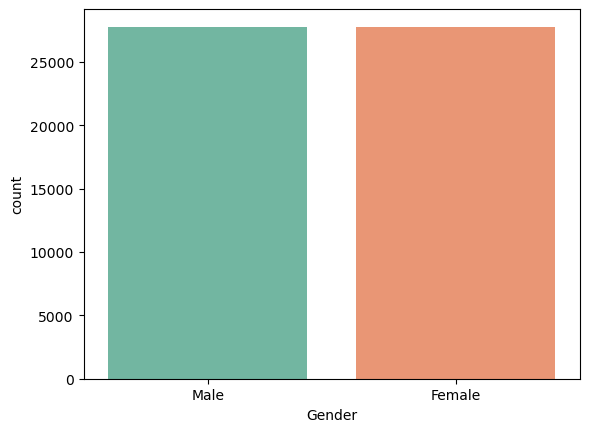

In [11]:
#patient demographics

#gender distribution
sns.countplot(x="Gender",data=df,palette="Set2")


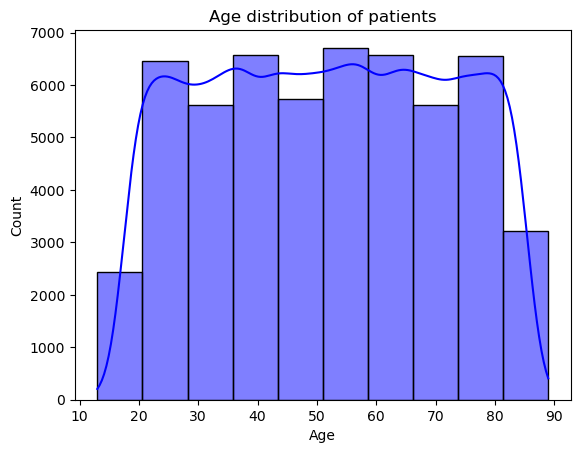

In [14]:
#Age distribution
sns.histplot(df["Age"],bins=10,kde=True,color="Blue")
plt.title("Age distribution of patients")
plt.show()

In [16]:
#Admission Type
adm_type = df["Admission Type"].value_counts()
print(adm_type)

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


In [18]:
#average billing amount by admission type
billing_dept = df.groupby("Admission Type")["Billing Amount"].mean().sort_values(ascending=False)
print("Average billing amount by admission type:\n",billing_dept)

Average billing amount by admission type:
 Admission Type
Elective     25602.226311
Urgent       25517.364497
Emergency    25497.397157
Name: Billing Amount, dtype: float64


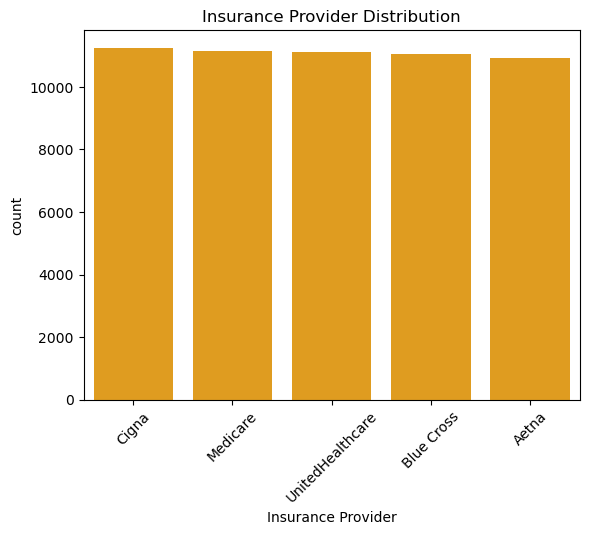

In [20]:
#Insurance coverage
sns.countplot(x="Insurance Provider",data=df,color="orange",order=df["Insurance Provider"].value_counts().index)
plt.title("Insurance Provider Distribution")
plt.xticks(rotation=45)
plt.show()

In [22]:
#patients handled per doctor
doc_count = df["Doctor"].value_counts().head()
print(doc_count)

Doctor
Michael Smith      27
John Smith         22
Robert Smith       22
James Smith        20
Michael Johnson    20
Name: count, dtype: int64
